In [77]:
#Lag en modell som predikerer tilsvarende XOR-Operatoren.
#Før du optimaliserer denne modellen må du initialisere modellvariablene med tilfeldige tall, for eksempel mellom -1 og 1.
#Visualiser både når modellen konvergerer og ikke konvergerer mot en riktig modell.

In [78]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [79]:
x1 = np.array([0.,0.,1.,1.], dtype=np.float32)
x2 = np.array([0.,1.,0.,1.], dtype=np.float32)
y = np.array([0.,0.,0.,1.], dtype=np.float32)

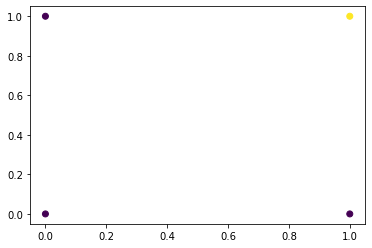

In [80]:
plt.scatter(x1,x2,c=y)

In [81]:
def create_dataset(x1,x2,y):
    x1 = np.repeat(x1,50)
    x2 = np.repeat(x2,50)
    y = np.repeat(y,50)

    x1 = x1 + np.random.rand(x1.shape[0])*0.05
    x2 = x2 + np.random.rand(x2.shape[0])*0.05

    #shuffle
    index_shuffle = np.arange(x1.shape[0])
    np.random.shuffle(index_shuffle)

    x1 = x1.astype(np.float32)
    x2 = x2.astype(np.float32)
    y = y.astype(np.float32)

    x1 = x1[index_shuffle]
    x2 = x2[index_shuffle]
    y = y[index_shuffle]

    x1_torch = torch.from_numpy(x1).clone().view(-1,1)
    x2_torch = torch.from_numpy(x2).clone().view(-1,1)
    y_torch = torch.from_numpy(y).clone().view(-1,1)

    x = torch.hstack([x1_torch,x2_torch])


    x_train = x[:150,:]
    x_test = x[150:,:]
    y_train = y_torch[:150,:]
    y_test = y_torch[150:, :]

    return x_train, y_train, x_test, y_test

In [82]:
x_train, y_train, x_test, y_test = create_dataset(x1,x2,y)

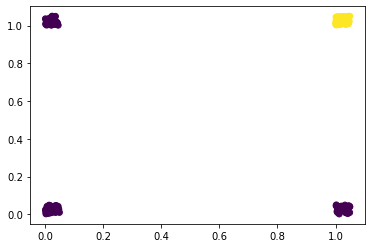

In [83]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

In [84]:
class LogisticRegression(torch.nn.Module):
    def __init__(self,inputDim, outputDim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(inputDim,outputDim)

    def forward(self,x):
        x = self.linear(x)
        output = torch.sigmoid(x)
        return output

In [85]:
model_AND = LogisticRegression(2,1)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model_AND.parameters(), lr=0.01)

In [86]:
def train(model, criterion, optimizer, x,y, iter):
    all_loss = []

    for epoch in range (iter):
        y_hat = model(x)

        loss = criterion(y_hat,y)
        all_loss.append(loss.item())
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()
    return all_loss

In [87]:
all_loss = train(model_AND, criterion, optimizer, x_train,y_train, 50000)

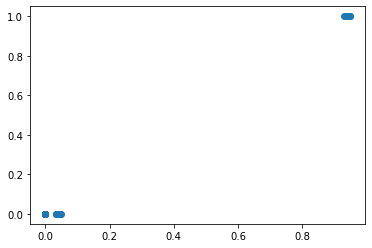

In [90]:
y_pred = model_AND.forward(x_test)
plt.scatter(y_pred.detach().numpy(), y_test)


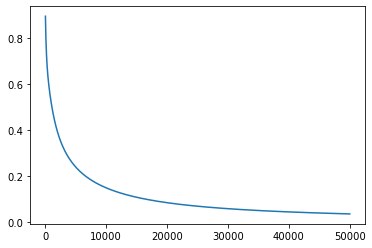

In [91]:
plt.plot(all_loss)